In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
import math
import cv2
import scipy

## 2 - Spatial and Frequency Domain Filtering

### 2.1 Filtering in the Frequency Domain

For this section each image goes through the same process to have a filter applied onto it:

1. Convert the image to single or double
2. Obtain the padding sizes P and Q, and then create the padded image, fp(x, y) using zero padding
3. Compute the DFT, F(u, v), of fp(x, y).
4. Construct the desired filter in frequency domain, H, of the same size as the padded image. 
5. Compute G(u, v) = H(u, v)F(u, v) using elementwise multiplication.
6. Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v) 
7. Crop the top left rectangle of gp to obtain an image of the original size
8. Convert the image to the class of the input image

In [2]:
# The following functions are implemented to perform filtering in the frequency domain

def D(p1, p2): # Disance formula between 2 points
    return math.sqrt(math.pow((p1[0]-p2[0]),2)+math.pow((p1[1]-p2[1]),2))


def butterworth_lp(D_zero,img_size,n): # Butterworth function to perform lowpass filter that'll be used to get other filters.
    lp_filter = np.zeros(img_size[:2])
    c = (img_size[0]/2,img_size[1]/2) # Get centre of image
    # Traverse the image
    for i in range(img_size[0]):
        for j in range(img_size[1]):
            lp_filter[i,j] = 1/(1+math.pow((D((i,j),c)/D_zero), (2*n)))
    return lp_filter

2.1.1) The Original Image with Lowpass Filtering (Frequency Domain): 


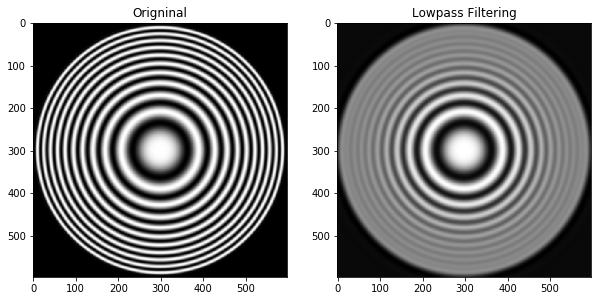

In [3]:
# Generate the output images using the above functions
# 2.1.1)
print("2.1.1) The Original Image with Lowpass Filtering (Frequency Domain): ")
img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * butterworth_lp(47, img.shape, 3) # Compute G(u, v) = H(u, v)F(u, v) using elementwise multiplication 

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

G = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

# Display 
img = io.imread('imgs/zoneplate.tif')
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Lowpass Filtering")
plt.imshow(np.real(G), cmap=plt.cm.gray)

plt.show(block=True)

2.1.2) The Original Image with Highpass Filtering (Frequency Domain): 


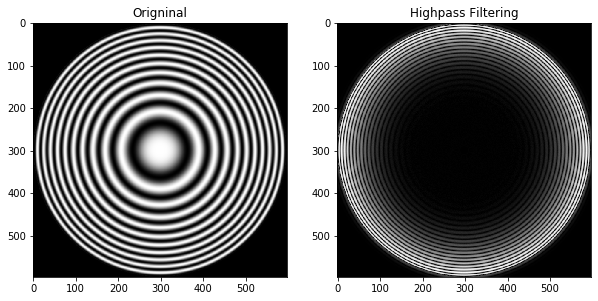

In [4]:
# 2.1.2)
print("2.1.2) The Original Image with Highpass Filtering (Frequency Domain): ")
img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * (1-(butterworth_lp(93, img.shape, 3))) # Compute G(u, v) = H(u, v)F(u, v) using elementwise multiplication and lowpass filtering

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

highpass_filter = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

# Display 
img = io.imread('imgs/zoneplate.tif')
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Highpass Filtering")
plt.imshow(np.abs(highpass_filter), cmap=plt.cm.gray)

plt.show(block=True)

2.1.3) The Original Image with Bandreject Filtering (Frequency Domain): 


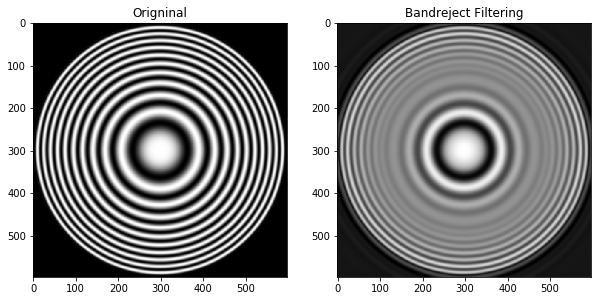

In [5]:
#2.1.3)
# In this case it is simpler to define a new butterworth function for bandreject filter than deriving it from the butterworth_lp 
# function.

def butterworth_br(D_zero,img_size,n): # Butterworth function to perform bandreject filter 
    br_filter = np.zeros(img_size[:2])
    c = (img_size[0]/2,img_size[1]/2) # Get centre of image
    # Traverse the image
    for i in range(img_size[0]):
        for j in range(img_size[1]):
            t = D((i,j),c)
            radius = ((40*t)/(math.pow(t,2)-D_zero**2))
            br_filter[i,j] = 1/(1+((radius**(2*n))))
    return br_filter

print("2.1.3) The Original Image with Bandreject Filtering (Frequency Domain): ")
img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * butterworth_br(50, img.shape, 3) # Compute G(u, v) = H(u, v)F(u, v) using elementwise multiplication 

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

G = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

# Display 
img = io.imread('imgs/zoneplate.tif')
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Bandreject Filtering")
plt.imshow(np.real(G), cmap=plt.cm.gray)

plt.show(block=True)
    

2.1.4) The Original Image with Bandpass Filtering (Frequency Domain): 


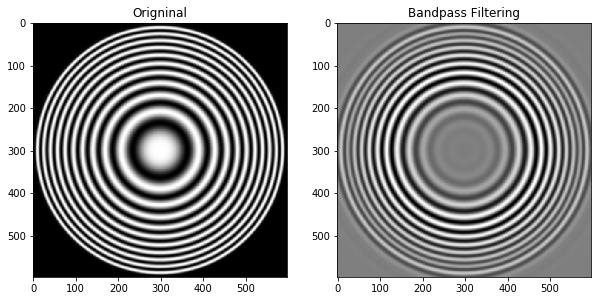

In [6]:
#2.1.4)
print("2.1.4) The Original Image with Bandpass Filtering (Frequency Domain): ")
img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * (1-(butterworth_br(50, img.shape, 2)))

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

G = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

# Display 
img = io.imread('imgs/zoneplate.tif')
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Bandpass Filtering")
plt.imshow(np.real(G), cmap=plt.cm.gray)

plt.show(block=True)
    

2.1.5) The Scaled Highpass and Bandpass Filter Images (Frequency Domain): 


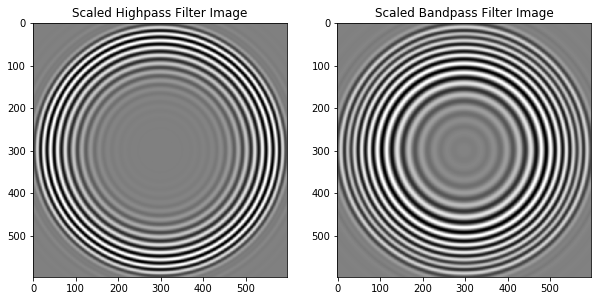

In [7]:
#2.1.5)
print("2.1.5) The Scaled Highpass and Bandpass Filter Images (Frequency Domain): ")
img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * (1-(butterworth_br(75, img.shape, 3)))

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

highpass_filter_scaled = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

img = io.imread('imgs/zoneplate.tif')
P,Q = img.shape #Obtain the padding sizes P and Q
# Create the padded image, fp(x, y) using zero padding.
cols = np.zeros((img.shape[0]-1, img.shape[1])); img = np.append(img,cols,axis=0)
rows = np.zeros((img.shape[0], img.shape[1]-1)); img = np.append(img,rows,axis=1)

# Compute the DFT, F(u, v), of fp(x, y)
img = np.fft.fft2(img)
DFT = np.fft.fftshift(img)

H = DFT * (1-(butterworth_br(55, img.shape, 3)))

# Obtain the filtered image (of size P × Q) by computing the inverse DFT of G(u, v)
G = np.fft.ifftshift(H) 
G = np.fft.ifft2(G)

bandpass_filter_scaled = G[:P,:Q] # Crop the top left rectangle of gp to obtain an image of the original size

# Display 
img = io.imread('imgs/zoneplate.tif')
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Scaled Highpass Filter Image")
plt.imshow(np.real(highpass_filter_scaled), cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Scaled Bandpass Filter Image")
plt.imshow(np.real(bandpass_filter_scaled), cmap=plt.cm.gray)

plt.show(block=True)


### 2.2 Filtering in the Spatial Domain

2.2.1) The Original Image with Lowpass Filtering (Spatial Domain): 


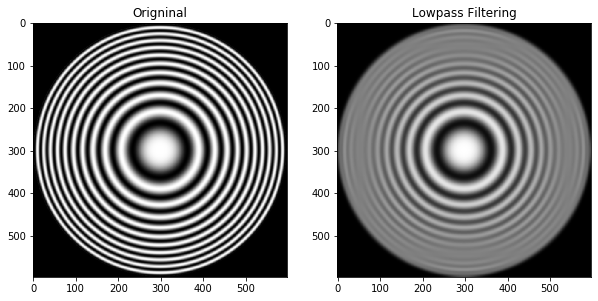

2.2.2) The Original Image with Highpass Filtering (Spatial Domain): 


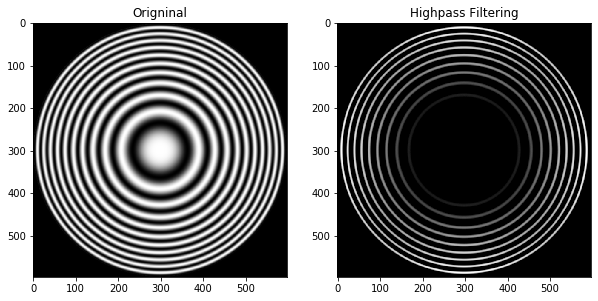

2.2.3) The Original Image with Bandreject Filtering (Spatial Domain): 
2.2.4) The Original Image with Bandpass Filtering (Spatial Domain): 


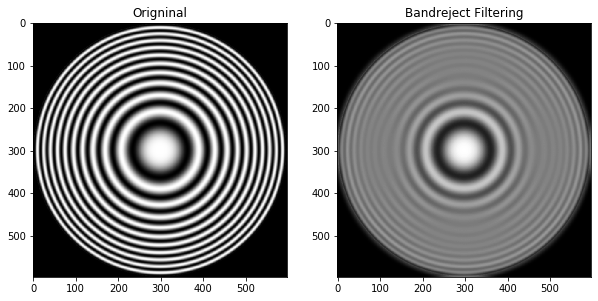

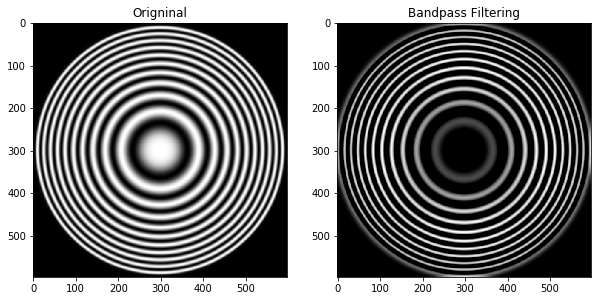

In [8]:
# Use built-in functions to genearate output images, because they generate outputs in the spatial domain
#2.2.1)

print("2.2.1) The Original Image with Lowpass Filtering (Spatial Domain): ")
img = io.imread('imgs/zoneplate.tif')
kernel_lowpass = np.ones((17,17),np.float32)/17**2
lowpass_filter = cv2.filter2D(img,-1,kernel_lowpass)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Lowpass Filtering")
plt.imshow(lowpass_filter, cmap=plt.cm.gray)

plt.show(block=True)

# 2.2.2)
print("2.2.2) The Original Image with Highpass Filtering (Spatial Domain): ")
img = io.imread('imgs/zoneplate.tif')
kernel_highpass = np.zeros((17,17),np.float32)/17**2
x = int(17/2)
kernel_highpass[x,x] = 0.85 # Set the centre value to 0.85 for better results
kernel_highpass = kernel_highpass - kernel_lowpass
highpass_filter = cv2.filter2D(img, -1, kernel_highpass)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Highpass Filtering")
plt.imshow(highpass_filter, cmap=plt.cm.gray)

plt.show(block=True)

# 2.2.3)
print("2.2.3) The Original Image with Bandreject Filtering (Spatial Domain): ")
img = io.imread('imgs/zoneplate.tif')

def gaussianKernel(length, sigma): # Define a function that returns a gaussian kernel
    x = np.linspace(-sigma, sigma, length + 1)
    kernel_1 = np.diff(scipy.stats.norm.cdf(x))
    kernel_2 = np.outer(kernel_1, kernel_1)
    return kernel_2/kernel_2.sum()

# Generate lowpass filters using a gaussian kernel
lowpass_filter1 = gaussianKernel(31,7.5) 
lowpass_filter2 = gaussianKernel(31,1.6)
unit_kernel =  np.zeros((31,31),np.float32)
unit_kernel[15,15] = 0.85 # Use a 0.85 kernel because it has better results
bandreject = unit_kernel - lowpass_filter1 + lowpass_filter2
bandreject_filter = cv2.filter2D(img,-1,bandreject)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Bandreject Filtering")
plt.imshow(bandreject_filter, cmap=plt.cm.gray)

# 2.2.4)
print("2.2.4) The Original Image with Bandpass Filtering (Spatial Domain): ")
img = io.imread('imgs/zoneplate.tif')
lowpass_filter1 = gaussianKernel(31, 1.6) 
lowpass_filter2 = gaussianKernel(31, 7.5)
unit_kernel =  np.zeros((31,31),np.float32)
unit_kernel[15,15] = 0.89 # Use a 0.85 kernel because it has better results
bandreject = unit_kernel - lowpass_filter1 + lowpass_filter2
bandpass = unit_kernel - bandreject
bandpass_filter = cv2.filter2D(img,-1,bandpass)

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)

fig.add_subplot(1,2,1)
plt.title("Origninal")
plt.imshow(img, cmap=plt.cm.gray)
fig.add_subplot(1,2,2)
plt.title("Bandpass Filtering")
plt.imshow(bandpass_filter, cmap=plt.cm.gray)